## Introduction to Gaussian Naive Bayes

Gaussian Naive Bayes is a probabilistic classification algorithm based on Bayes' Theorem, assuming that features follow a normal (Gaussian) distribution and are conditionally independent given the class label.

## Bayes' Theorem

$$
P(y \mid X) = \frac{P(X \mid y) \cdot P(y)}{P(X)}
$$

where:
- $P(y \mid X)$ is the posterior probability of class $y$ given features $X$.
- $P(X \mid y)$ is the likelihood of features $X$ given class $y$.
- $P(y)$ is the prior probability of class $y$.
- $P(X)$ is the probability of features $X$.

## Gaussian Likelihood

For each feature $x_i$, the likelihood under the Gaussian assumption is:

$$
P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma_{y,i}^2}} \exp\left(-\frac{(x_i - \mu_{y,i})^2}{2\sigma_{y,i}^2}\right)
$$

where:
- $\mu_{y,i}$ is the mean of feature $i$ for class $y$.
- $\sigma_{y,i}^2$ is the variance of feature $i$ for class $y$.

## Classification Rule

The predicted class $\hat{y}$ for a sample $X$ is:

$$
\hat{y} = \arg\max_{y} \; P(y) \prod_{i=1}^{n} P(x_i \mid y)
$$

Gaussian Naive Bayes is simple, efficient, and often effective for high-dimensional datasets.


<br>

### **Heart Attack Analysis and Prediction**

In [333]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [334]:
df = pd.read_csv('../data/heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [336]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [337]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [338]:
df.drop_duplicates(keep='first',inplace=True)

In [339]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [340]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<h4><b>Gender Categorization

In [341]:
x = df.sex.value_counts()
x

sex
1    206
0     96
Name: count, dtype: int64

In [342]:
x[1],x[0]

(np.int64(206), np.int64(96))

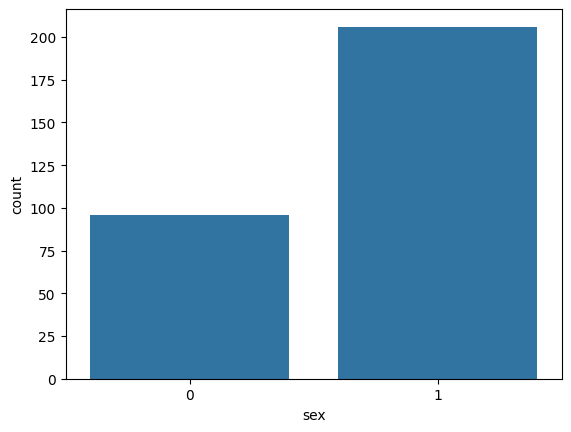

In [343]:
p = sns.countplot(data=df, x='sex')

In [344]:
x = (df.cp.value_counts())
x

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64

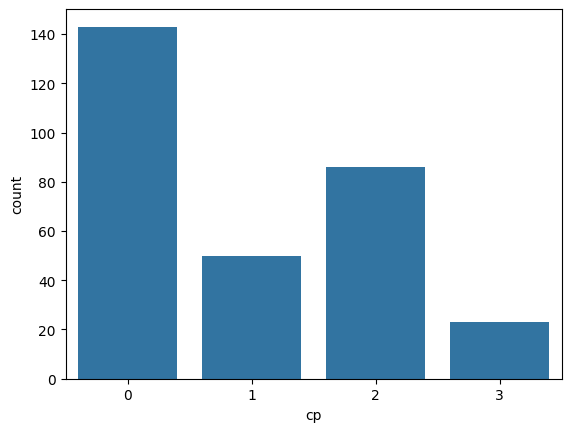

In [345]:
p = sns.countplot(data=df, x='cp')

In [346]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [347]:
df.head(20)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


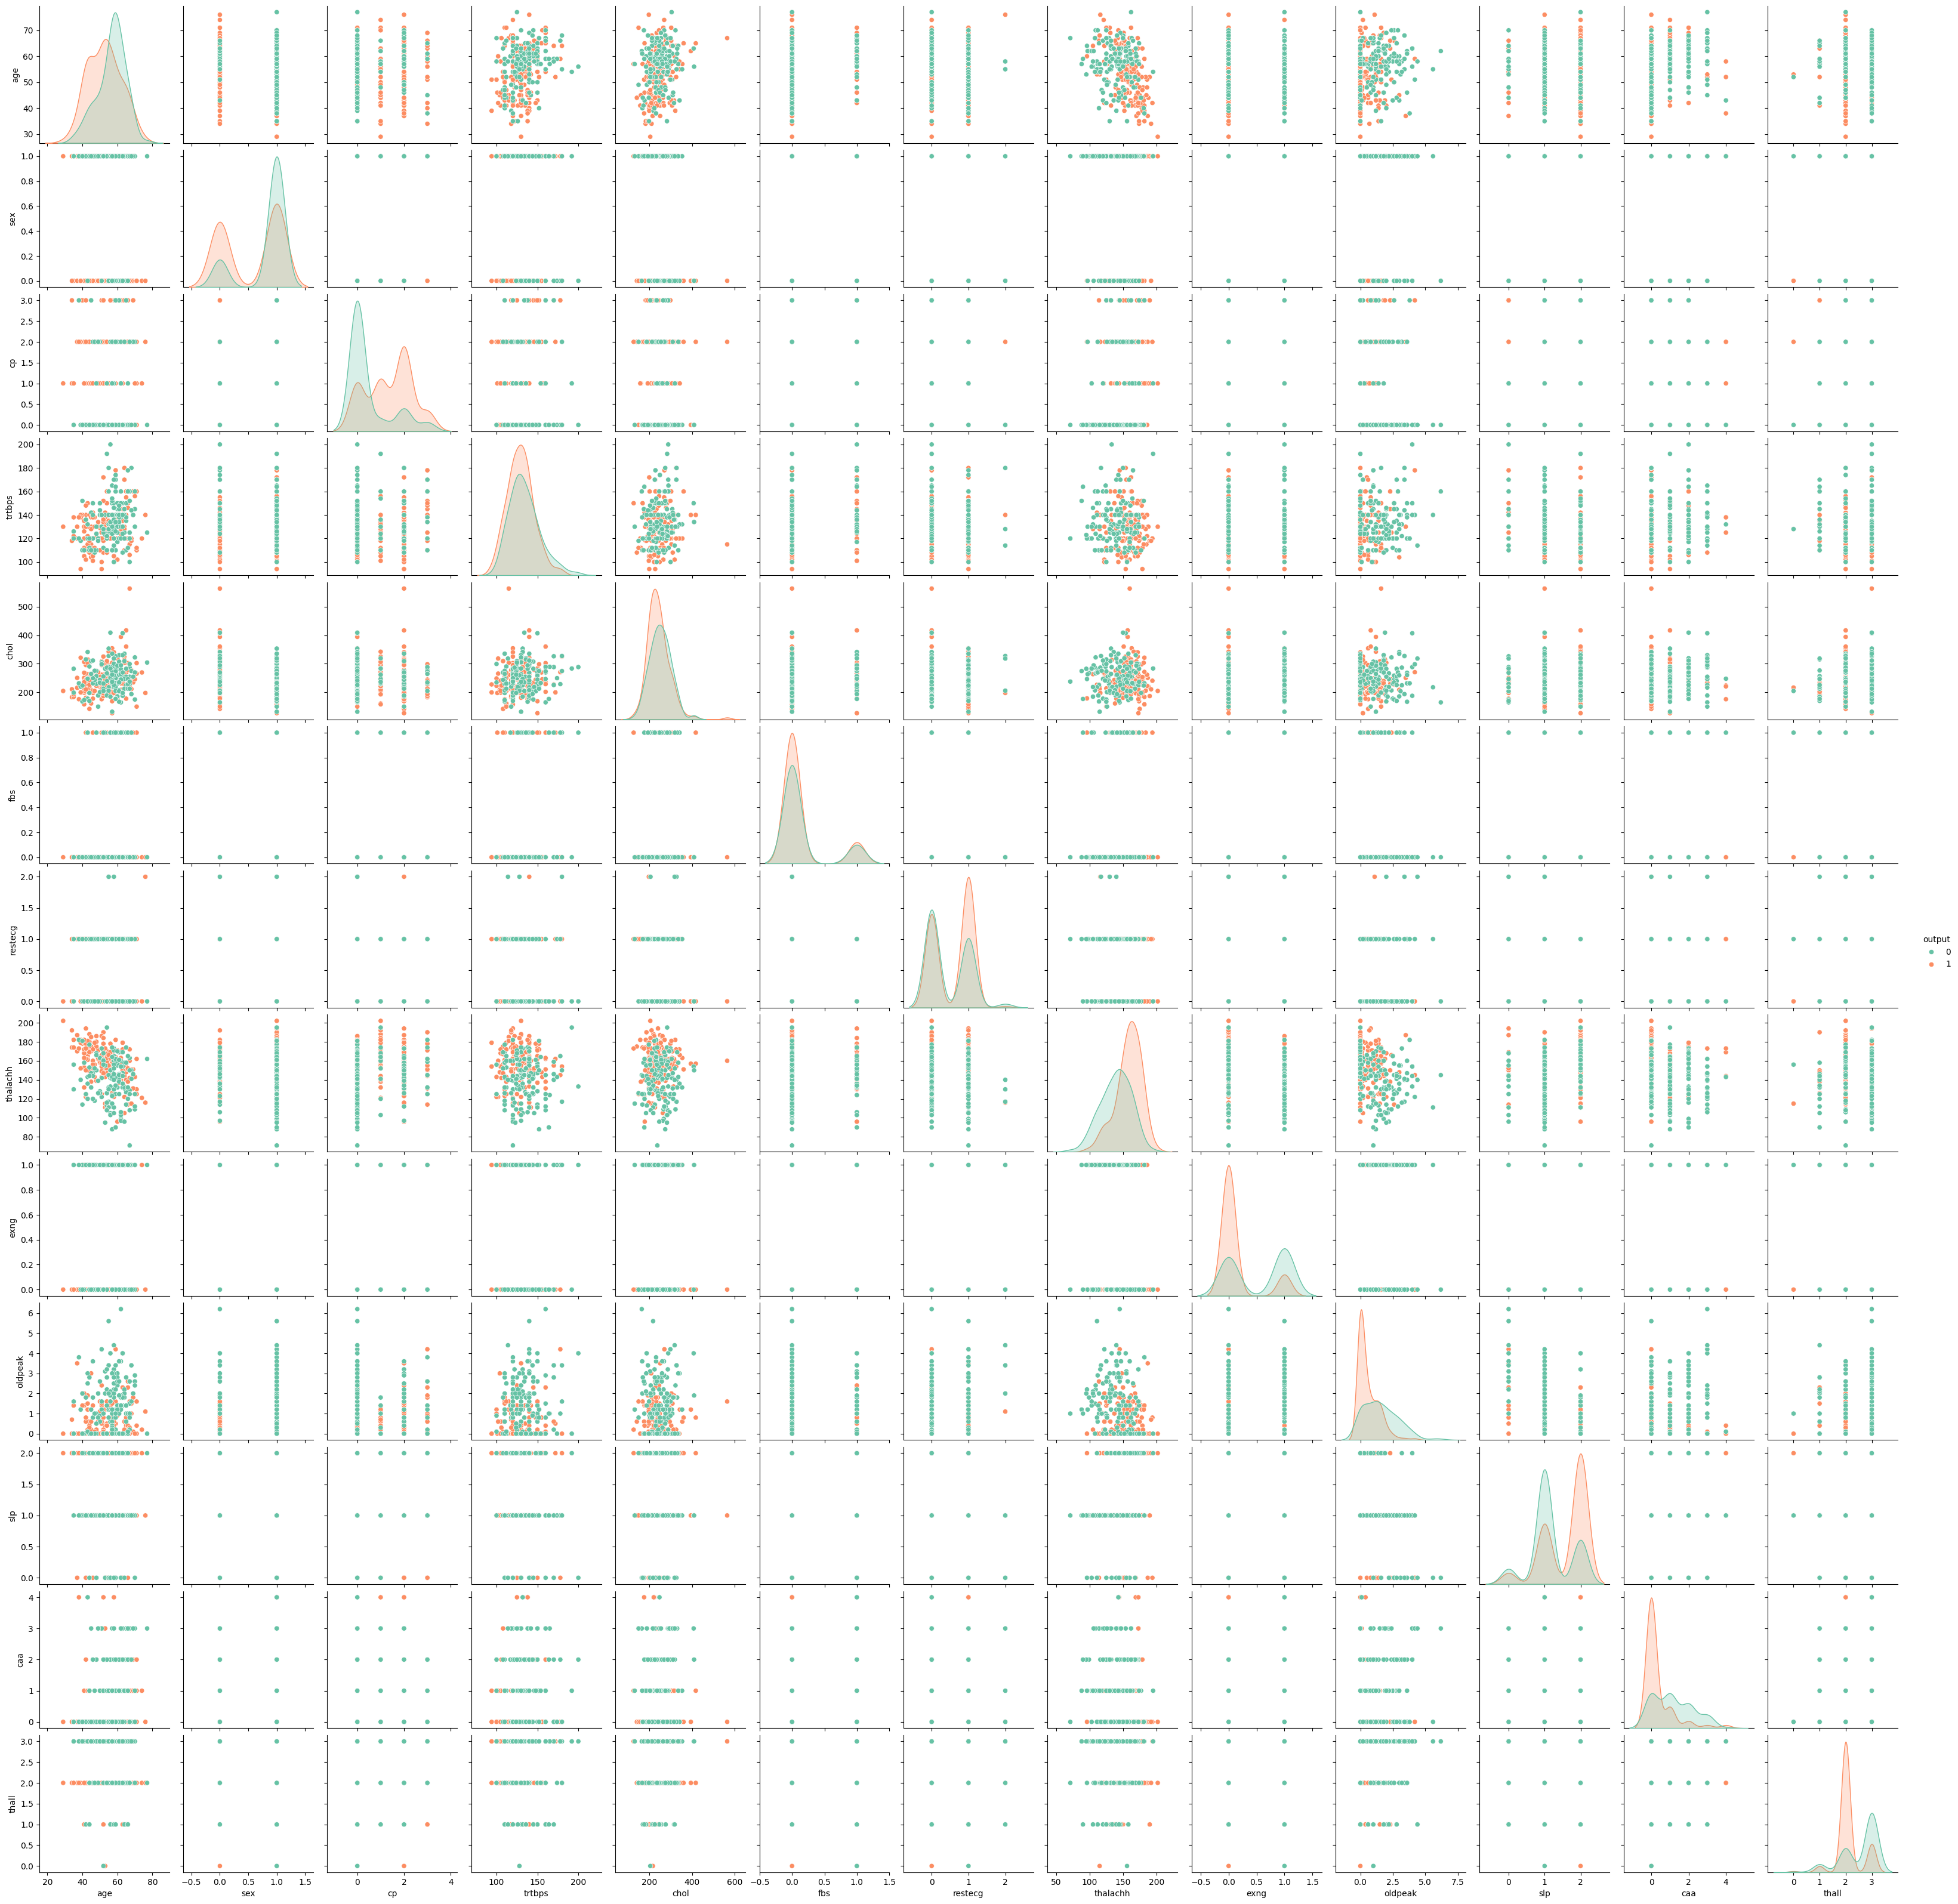

In [363]:
sns.pairplot(data = df, hue='output', palette='Set2')

<h3>Age Distribution

<Figure size 1000x1000 with 0 Axes>

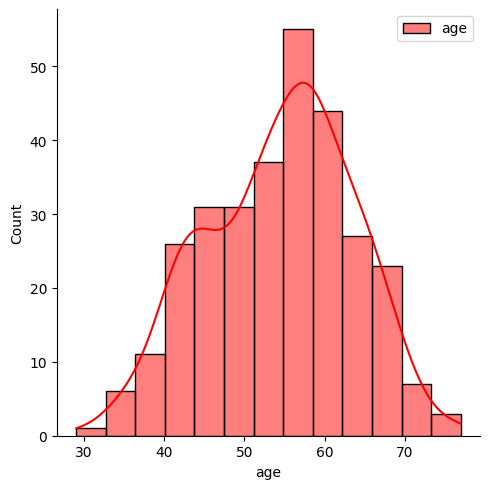

In [348]:
plt.figure(figsize=(10,10))
sns.displot(df.age, color='red', label='age', kde=True)
plt.legend()

<Figure size 1000x1000 with 0 Axes>

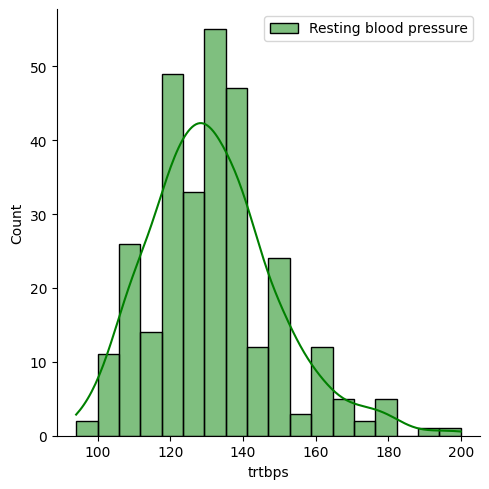

In [349]:
plt.figure(figsize=(10,10))
sns.displot(df.trtbps, color='green', label='Resting blood pressure', kde=True)
plt.legend()

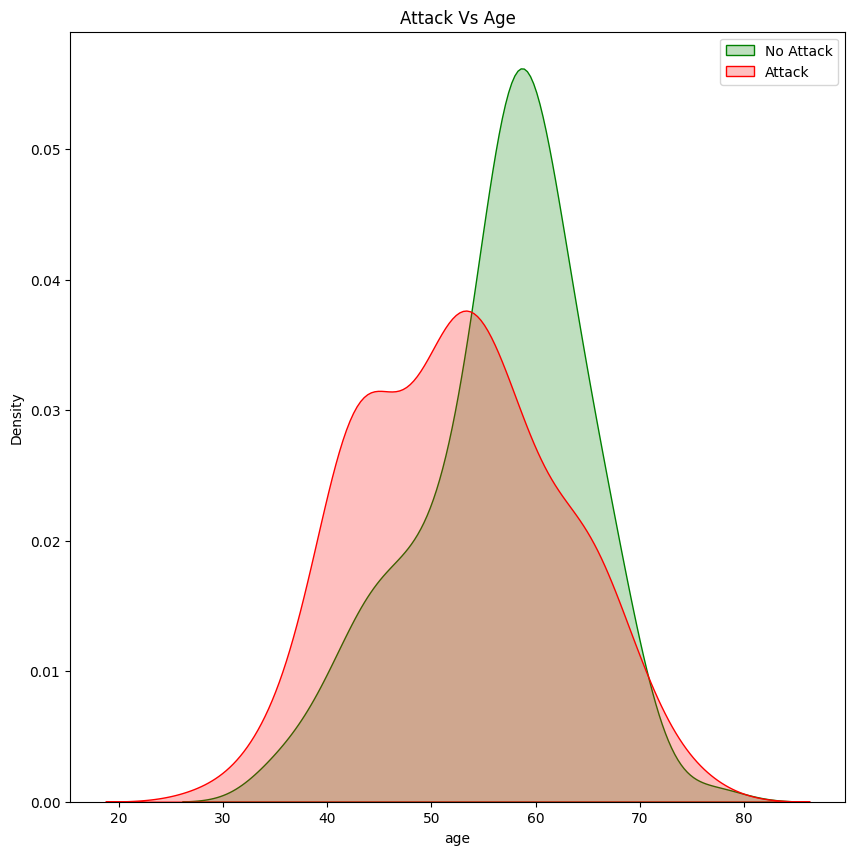

In [350]:
plt.figure(figsize=(10,10))
sns.kdeplot(df[df['output']==0]['age'], color='green', label='No Attack', fill=True)
sns.kdeplot(df[df['output']==1]['age'], color='red', label='Attack', fill=True)
plt.title("Attack Vs Age")
plt.legend()
plt.show()

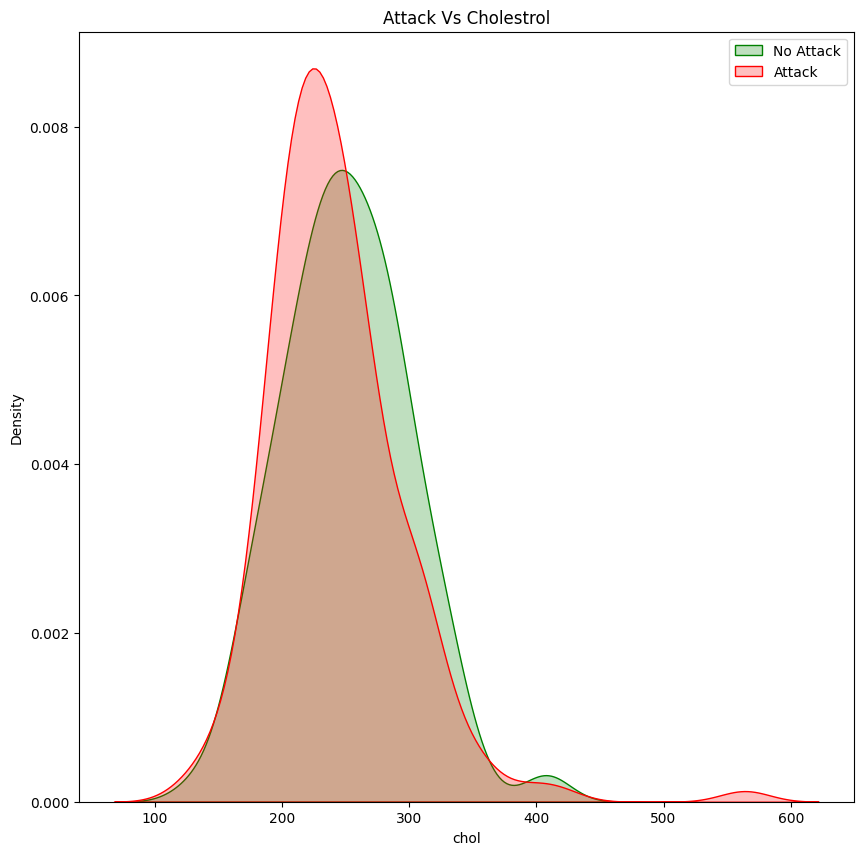

In [351]:
plt.figure(figsize=(10,10))
sns.kdeplot(df[df['output']==0]['chol'], color='green', label='No Attack', fill=True)
sns.kdeplot(df[df['output']==1]['chol'], color='red', label='Attack', fill=True)
plt.title("Attack Vs Cholestrol")
plt.legend()
plt.show()

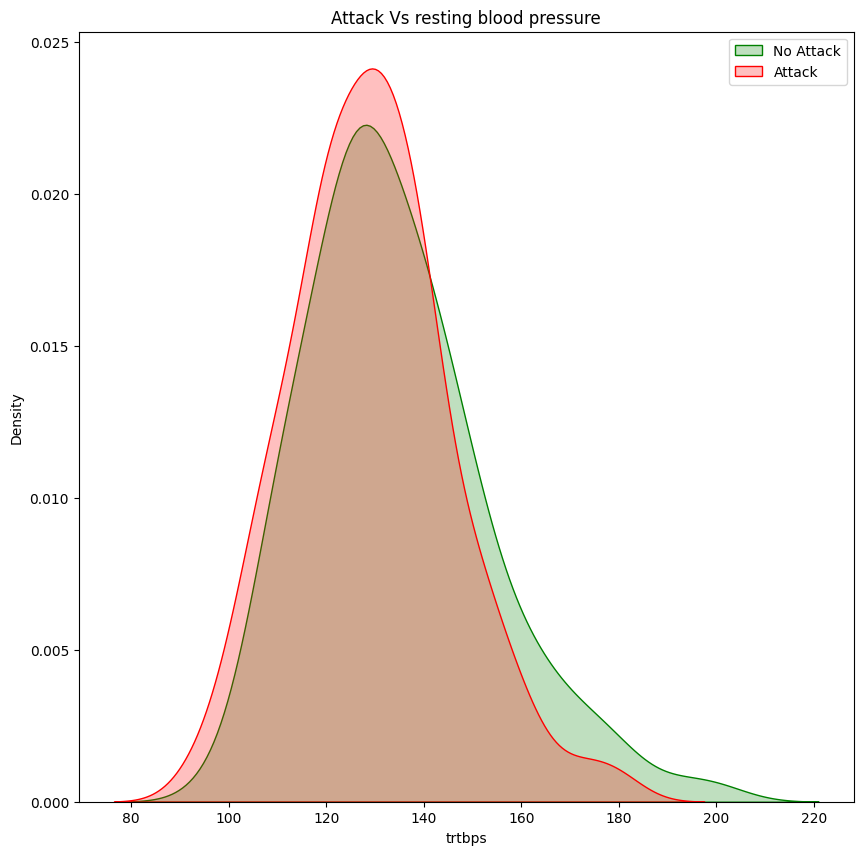

In [352]:
plt.figure(figsize=(10,10))
sns.kdeplot(df[df['output']==0]['trtbps'], color='green', label='No Attack', fill=True)
sns.kdeplot(df[df['output']==1]['trtbps'], color='red', label='Attack', fill=True)
plt.title("Attack Vs resting blood pressure")
plt.legend()
plt.show()

In [353]:
y = df.iloc[:,-1].values

In [354]:
X =df.iloc[:,1:-1].values

In [355]:
X,y

(array([[  1.,   3., 145., ...,   0.,   0.,   1.],
        [  1.,   2., 130., ...,   0.,   0.,   2.],
        [  0.,   1., 130., ...,   2.,   0.,   2.],
        ...,
        [  1.,   0., 144., ...,   1.,   2.,   3.],
        [  1.,   0., 130., ...,   1.,   1.,   3.],
        [  0.,   1., 130., ...,   1.,   1.,   2.]], shape=(302, 12)),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [356]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

<h3>Standardization or Normalization or Feature Scaling

In [357]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [358]:
from sklearn.naive_bayes import GaussianNB
model =GaussianNB()

In [359]:
model.fit(X_train,y_train)


GaussianNB()

In [360]:
y_pred = model.predict(X_test)

In [361]:
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1])

In [362]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true=y_test, y_pred=y_pred)

0.8571428571428571